<div style="text-align: left; background-color:#4e4e4e; font-family: Trebuchet MS; color:white; padding: 12px; line-height:1.25;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 38px;border-style: solid;border-color: dark green;">Human Resources Analytic Visulization</div>

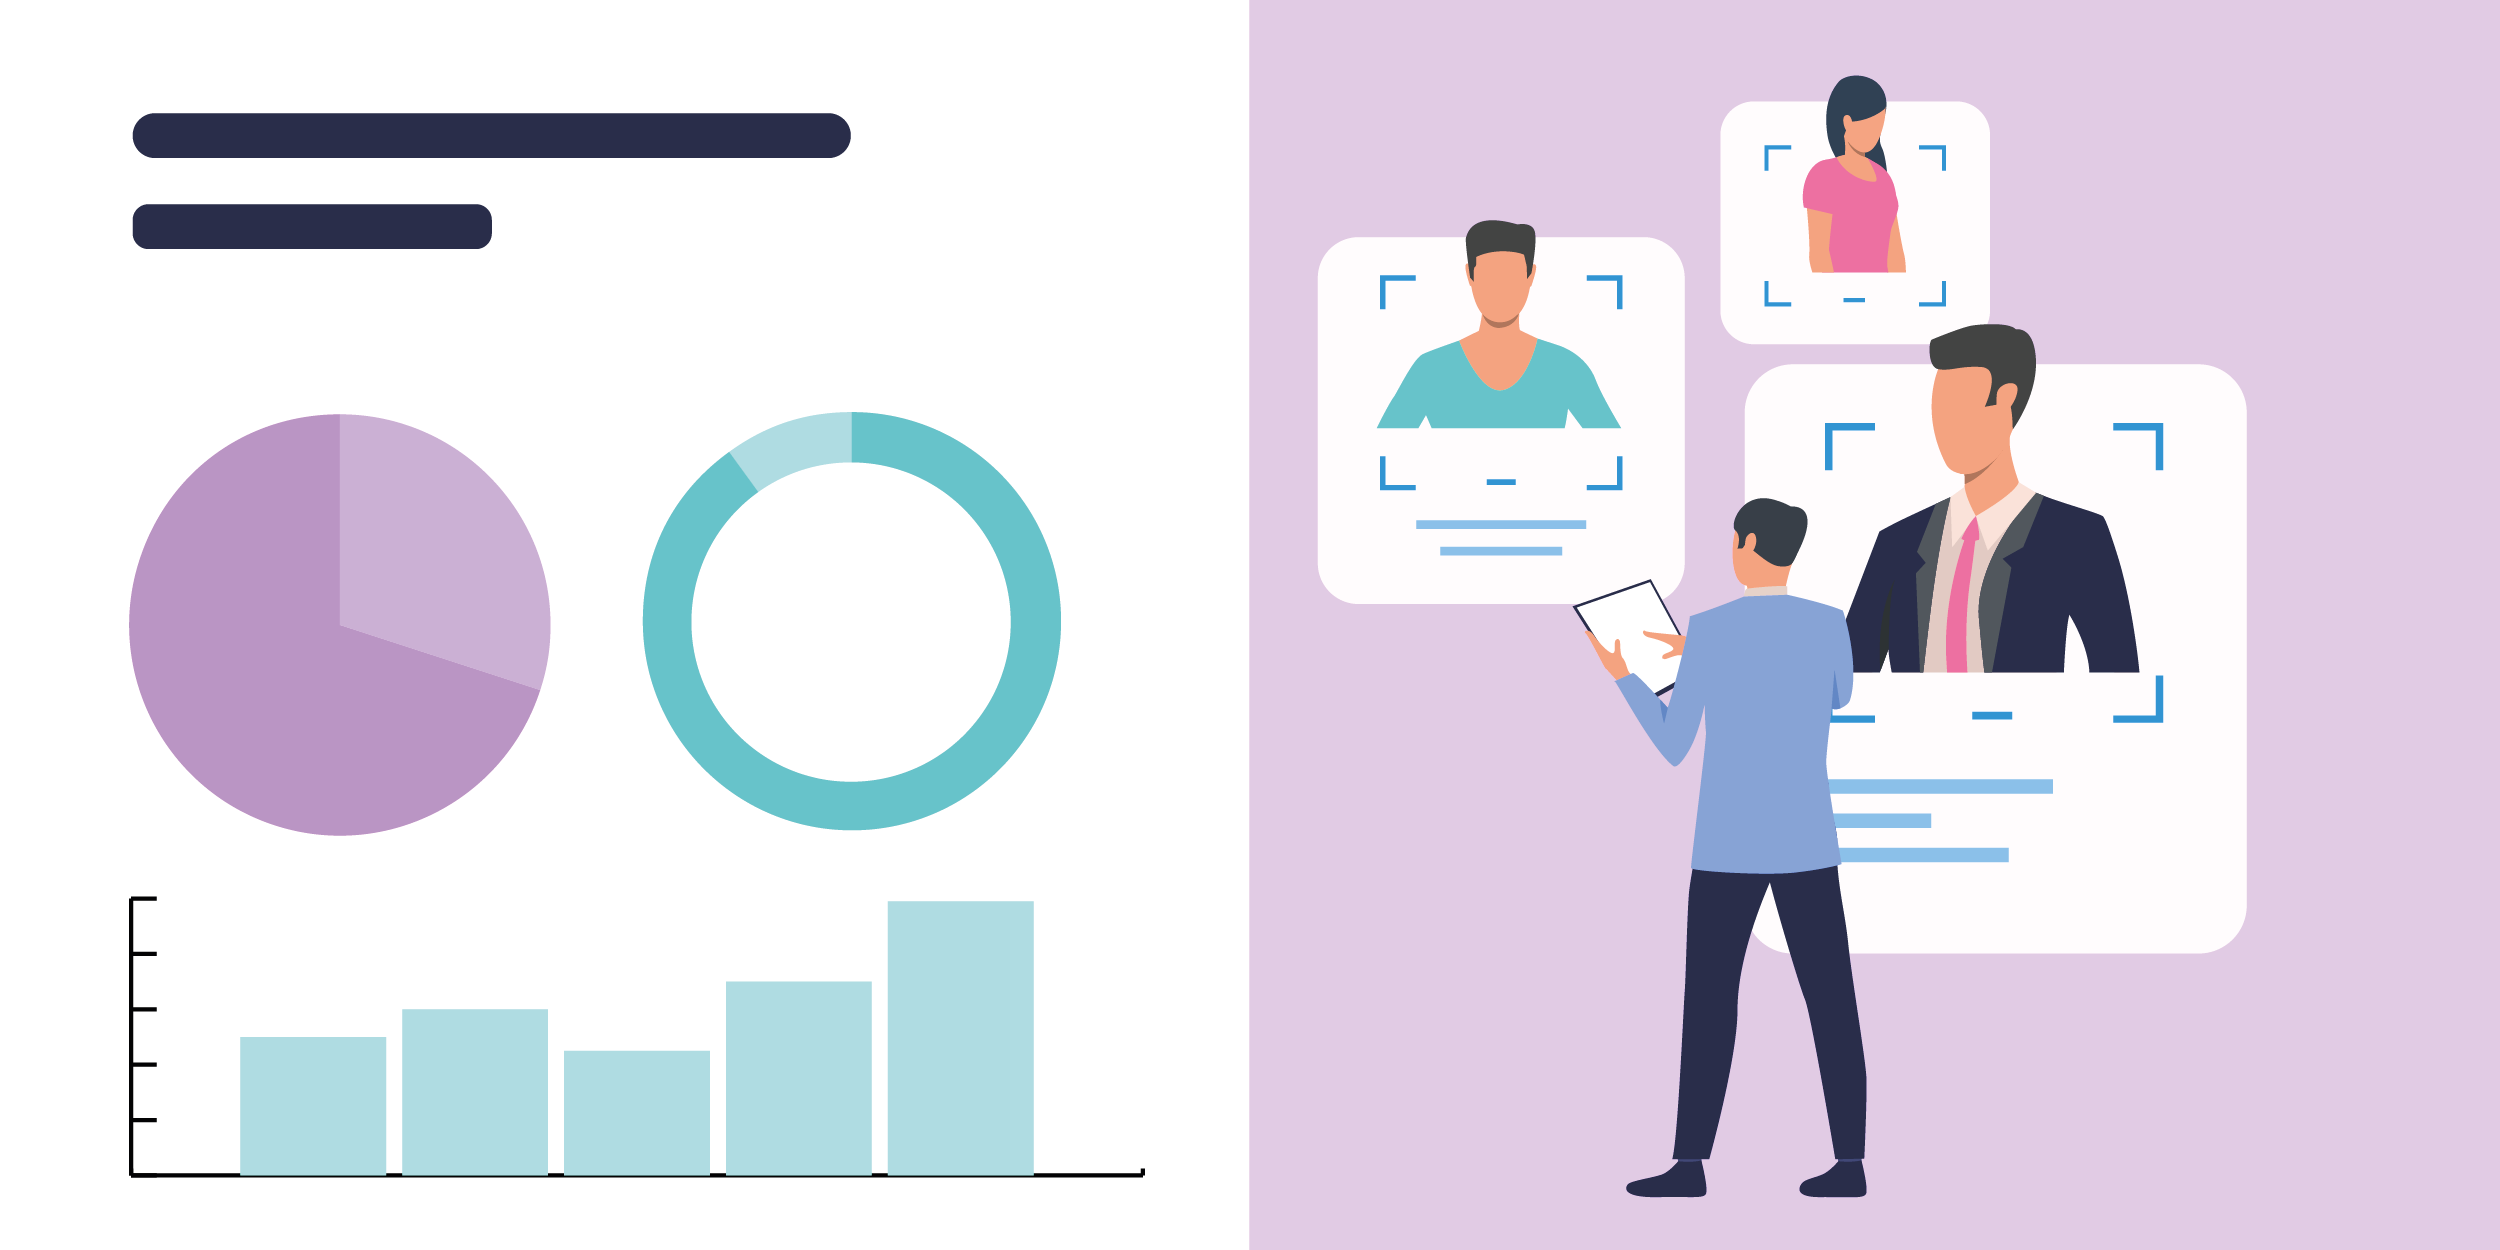

📑
-  `employee_id:`	Unique ID for employee	
-  `department:`	Department of employee
-  `region:`	Region of employment (unordered)
-  `education:`	Education Level
-  `gender:`	Gender of Employee
-  `recruitment_channel:`	Channel of recruitment for employee
-  `no_of_trainings:`	no of other trainings completed in previous year on soft skills, technical skills etc.
-  `age:`	Age of Employee
-  `previous_year_rating:` Employee Rating for the previous year
-  `length_of_service:` Length of service in years
-  `KPIs_met >80%:` if Percent of KPIs(Key performance Indicators) >80% then 1 else 0
-  `awards_won?:` if awards won during previous year then 1 else 0
-  `avg_training_score:` Average score in current training evaluations
-  `is_promoted (Target):`	Recommended for promotion

# `Importing Libraries:` 

In [3]:
import os # Importing the 'os' module for operating system-related functionalities.
import math # Importing the 'math' module for mathematical operations and functions.
import numpy as np # Importing the 'numpy' library and assigning it an alias 'np' for numerical computing and array operations.
import pandas as pd # Importing the 'pandas' library and assigning it an alias 'pd' for data manipulation and analysis.
import seaborn as sns # Importing the 'seaborn' library and assigning it an alias 'sns' for data visualization and statistical graphics.
import tensorflow as tf # Importing the 'tensorflow' library and assigning it an alias 'tf' for building and training machine learning models.
import missingno as msno # Importing the 'missingno' library and assigning it an alias 'msno' for visualizing missing data patterns.
from sklearn import metrics # Importing the 'metrics' module from the 'sklearn' library for evaluating model performance.
import matplotlib.pyplot as plt # Importing the 'pyplot' module from the 'matplotlib' library and assigning it an alias 'plt' for creating plots and visualizations.
from sklearn.utils import class_weight # Importing the 'class_weight' module from the 'sklearn.utils' module for handling class imbalance in machine learning models.
from sklearn.preprocessing import LabelEncoder # lets use Label Encoding for Gender and Department to convert them into Numerical
from sklearn.model_selection import train_test_split # Split arrays or matrices into random train and test subsets.
from sklearn.preprocessing import StandardScaler, MinMaxScaler # Importing the 'StandardScaler' and 'MinMaxScaler' classes from the 'sklearn.preprocessing' module for feature scaling and normalization.



In [750]:
# read train and test datasets.
train = pd.read_csv('dm_train.csv')
test = pd.read_csv('dm_test.csv')

# `EDA :  `

<blockquote style="margin-right:auto; margin-left:auto; color:white; background-color:#4e4e4e; padding: 1em; margin:24px;">

<font color="white" size=+1.0><b>What EDA :</b></font>  
        EDA stands for Exploratory Data Analysis. It is an approach used in data analysis to summarize, visualize, and gain insights from the available data. EDA involves exploring and understanding the main characteristics of the dataset before applying any formal statistical techniques or modeling..

<ul>
<li> Data Understanding: EDA helps in getting familiar with the data, understanding its structure, and gaining insights into the variables and their relationships.

<li> Data Cleaning: EDA aids in identifying missing values, outliers, or inconsistencies in the dataset and helps in deciding how to handle them appropriately.

<li> Feature Selection: EDA assists in identifying the relevant features or variables that are most likely to have an impact on the target variable, and discarding irrelevant or redundant features.

<li> Relationship Exploration: EDA helps in exploring the relationships between variables through statistical summaries, visualizations, and correlation analysis.

<li> Pattern Identification: EDA helps in identifying patterns, trends, or anomalies in the data, which can lead to further investigation or guide the development of predictive models.


</ul>        
</blockquote>

## `Promoted Column:`

In [751]:
promoted_df  = train[train['is_promoted'] == 1]
not_promoted_df = train[train['is_promoted'] == 0]
def plot_bar(field):
    # Create labels for each category in the given field based on value counts in the DataFrame
    labels = [f"{dept}" for dept, count in train[field].value_counts().items()]
    # Get the count of promoted employees for each category in the field
    promoted = promoted_df[field].value_counts().values
    # Get the count of not promoted employees for each category in the field
    not_promoted = not_promoted_df[field].value_counts().values
    # Plot the bar chart with promoted and not promoted counts
    plt.bar(labels, promoted, label="Promoted", color='blue', bottom=not_promoted)
    plt.bar(labels, not_promoted, label="Not promoted", color='red')
    plt.legend()
def group_by_promotion(field):
    # Group the data by the given field and calculate counts for promoted, not promoted, and total employees
    cell_values = pd.DataFrame(data={
        'value': list(promoted_df.groupby(by=field).count().index),
        'promoted': promoted_df.groupby(by=field).count()['employee_id'].values,
        'not_promoted': not_promoted_df.groupby(by=field).count()['employee_id'].values,
        'total': train.groupby(by=field).count()['employee_id'].values,
    })
    # Calculate the percentage of promoted employees for each category
    cell_values['promoted_perc'] = cell_values['promoted'] / cell_values['total']
    # Calculate the percentage of not promoted employees for each category
    cell_values['not_promoted_perc'] = cell_values['not_promoted'] / cell_values['total']
    return cell_values
def plot_categorical_data(field, figsize=(20, 5)):
    # Set the size of the figure for plotting
    plt.figure(figsize=figsize)
    # Plot the bar chart for the given field
    plot_bar(field)
    # Print the grouped data showing counts and percentages of promoted and not promoted employees
    print(group_by_promotion(field))
    # Show the plot
    plt.show()
def plot_numerical_data(field):
    plt.hist(not_promoted_df[field], label="Not Promoted", color='red', alpha=0.6)
    plt.hist(promoted_df[field], label="Promoted", color='blue', alpha=.6)    

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


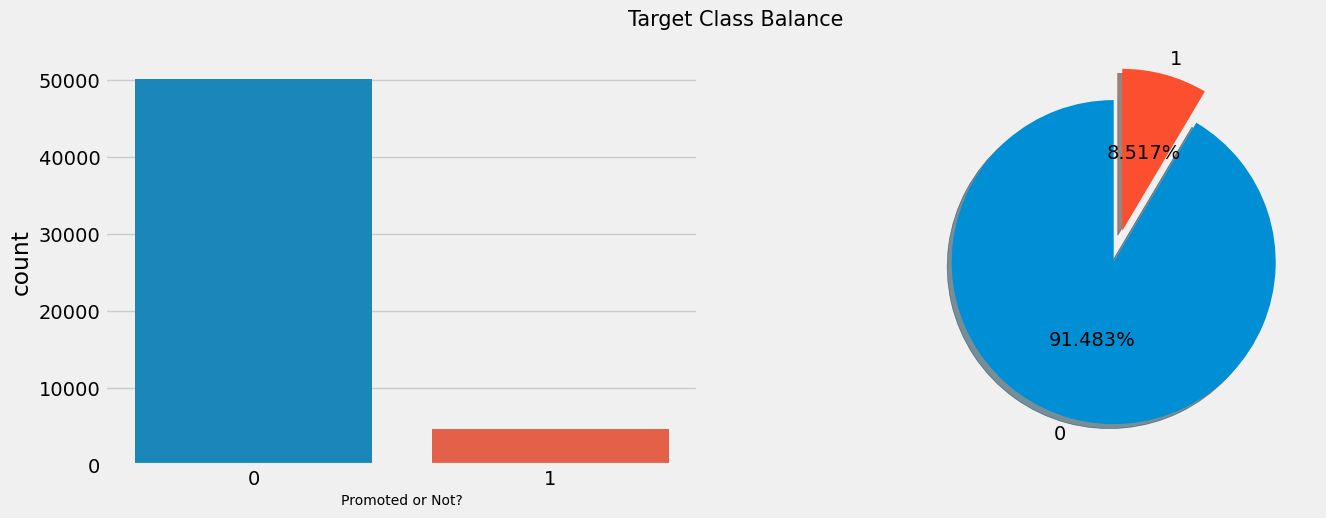

In [752]:
# This controls the overall size of the plot.
plt.rcParams['figure.figsize'] = (15, 5) # Set the figure size for the plot to (15, 5) using the rcParams dictionary from matplotlib.pyplot. 
plt.style.use('fivethirtyeight') # Apply the 'fivethirtyeight' style to the plot. This sets the visual style of the plot according to the specified style.
plt.subplot(1, 2, 1) # Create a subplot with a 1x2 grid and set the current plot to the first subplot.
sns.countplot(train['is_promoted'],) # Create a countplot using seaborn (sns) library, based on the 'is_promoted' column of the 'train' DataFrame. This plot visualizes the count of each category in the 'is_promoted' column.
plt.xlabel('Promoted or Not?', fontsize = 10) # Set the label for the x-axis of the current plot to 'Promoted or Not?' with a font size of 10.
plt.subplot(1, 2, 2) # Set the current plot to the second subplot in the 1x2 grid.
# Create a pie chart based on the value counts of the 'is_promoted' column of the 'train' DataFrame. 
# The pie chart represents the proportion of each category ('1' and '0') in the 'is_promoted' column.
train['is_promoted'].value_counts().plot(kind = 'pie', 
                                         explode = [0, 0.2], autopct = '%.3f%%', startangle = 90,
                                         labels = ['0','1'], shadow = True, pctdistance = 0.5)
plt.axis('off') # Turn off the axis display for the current plot. This removes the axis lines and labels.
plt.suptitle('Target Class Balance', fontsize = 15) # Set the super title for the entire figure to 'Target Class Balance' with a font size of 15. This title appears on top of the subplots.
plt.show() # Display the complete figure with all the subplots and titles.

<div class="alert alert-block alert-info">
<b>My note:</b> 
  
    - Data is highly imbalanced.
    - 91.48% are not promoted.
    - 8.51% are promoted.
</div>

## `Department Column:`

               value  promoted  not_promoted  total  promoted_perc  \
0          Analytics       512          4840   5352       0.095665   
1            Finance       206          2330   2536       0.081230   
2                 HR       136          2282   2418       0.056245   
3              Legal        53           986   1039       0.051011   
4         Operations      1023         10325  11348       0.090148   
5        Procurement       688          6450   7138       0.096386   
6                R&D        69           930    999       0.069069   
7  Sales & Marketing      1213         15627  16840       0.072031   
8         Technology       768          6370   7138       0.107593   

   not_promoted_perc  
0           0.904335  
1           0.918770  
2           0.943755  
3           0.948989  
4           0.909852  
5           0.903614  
6           0.930931  
7           0.927969  
8           0.892407  


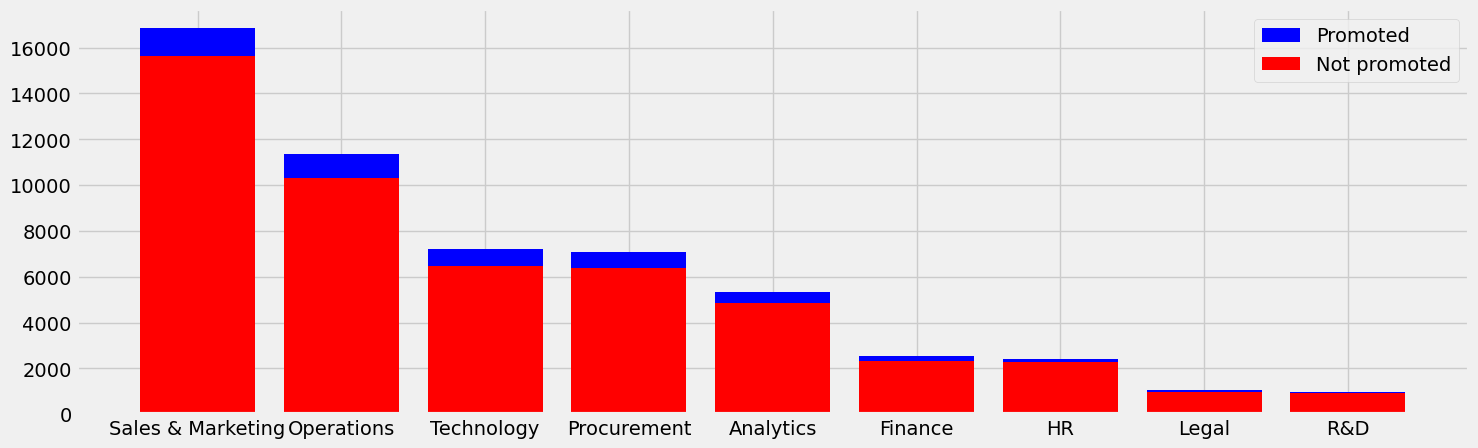

In [753]:
plot_categorical_data('department', figsize=(16,5))

📌
### `Insight`: Write here

## `Region Column:`

        value  promoted  not_promoted  total  promoted_perc  not_promoted_perc
0    region_1        58           552    610       0.095082           0.904918
1   region_10        51           597    648       0.078704           0.921296
2   region_11        74          1241   1315       0.056274           0.943726
3   region_12        33           467    500       0.066000           0.934000
4   region_13       230          2418   2648       0.086858           0.913142
5   region_14        62           765    827       0.074970           0.925030
6   region_15       222          2586   2808       0.079060           0.920940
7   region_16       102          1363   1465       0.069625           0.930375
8   region_17       109           687    796       0.136935           0.863065
9   region_18         1            30     31       0.032258           0.967742
10  region_19        53           821    874       0.060641           0.939359
11   region_2       989         11354  12343       0

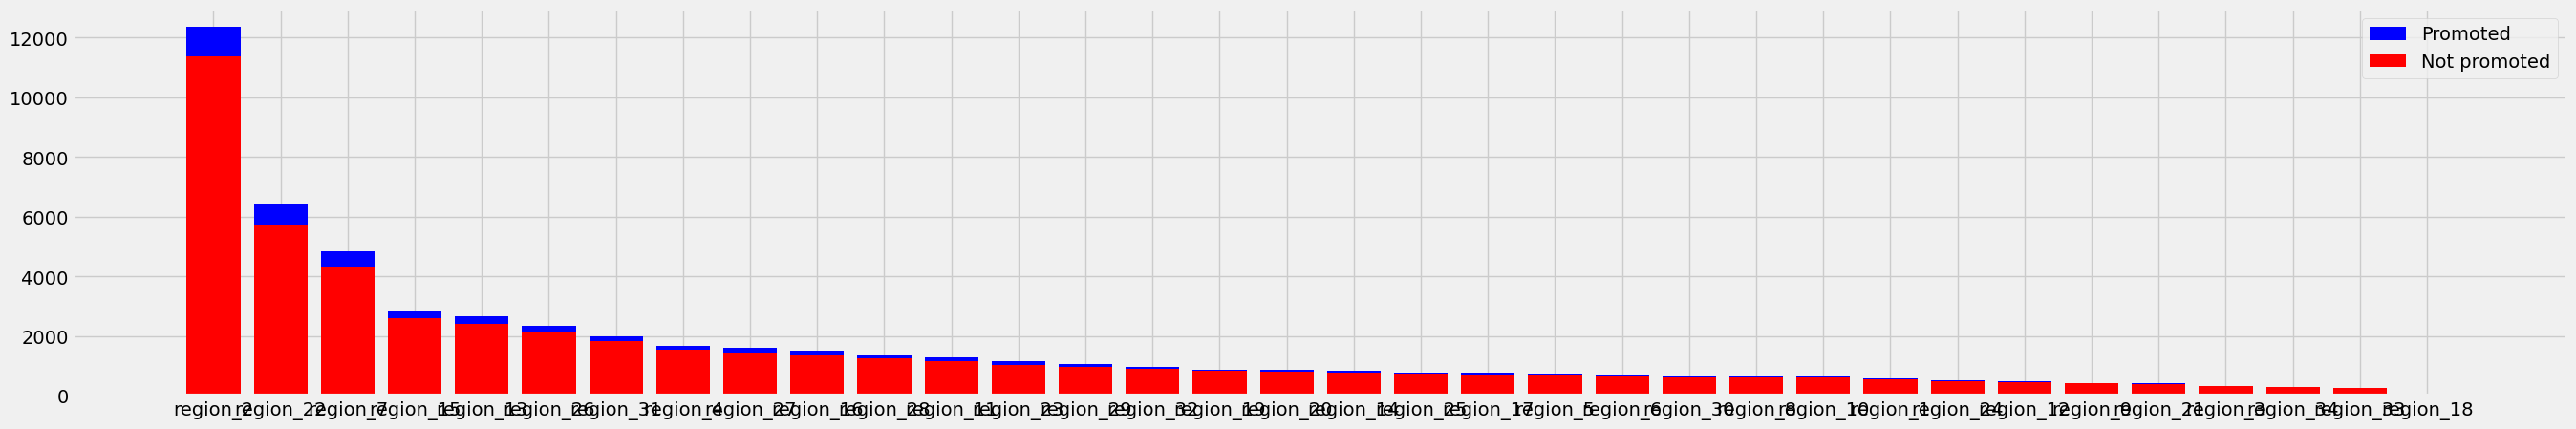

In [754]:
plot_categorical_data('region', figsize=(30,5))

📌
### `Insight`: Write here

## `Education Column:`

              value  promoted  not_promoted  total  promoted_perc  \
0        Bachelor's      3008         33661  36669       0.082031   
1   Below Secondary        67           738    805       0.083230   
2  Master's & above      1471         13454  14925       0.098559   

   not_promoted_perc  
0           0.917969  
1           0.916770  
2           0.901441  


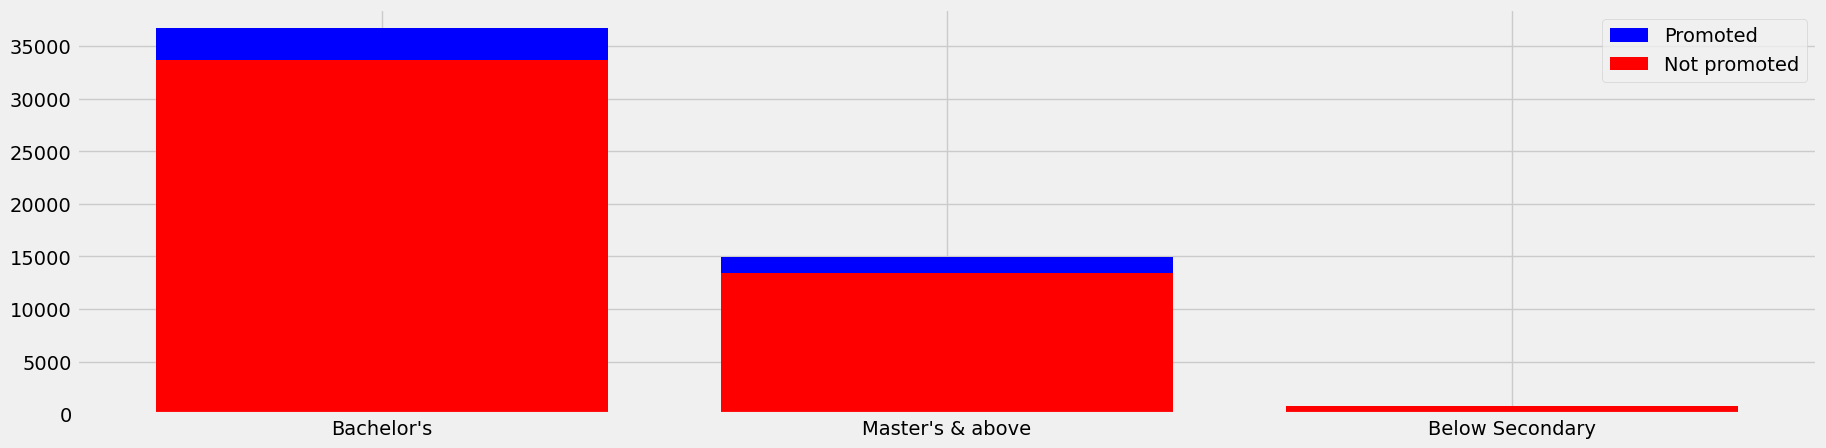

1471

In [755]:
plot_categorical_data('education')
len(train[(train['education'] == "Master's & above") & (train['is_promoted'] == 1)])

📌
### `Insight`: Write here

## `Gender Column:`

  value  promoted  not_promoted  total  promoted_perc  not_promoted_perc
0     f      1467         14845  16312       0.089934           0.910066
1     m      3201         35295  38496       0.083151           0.916849


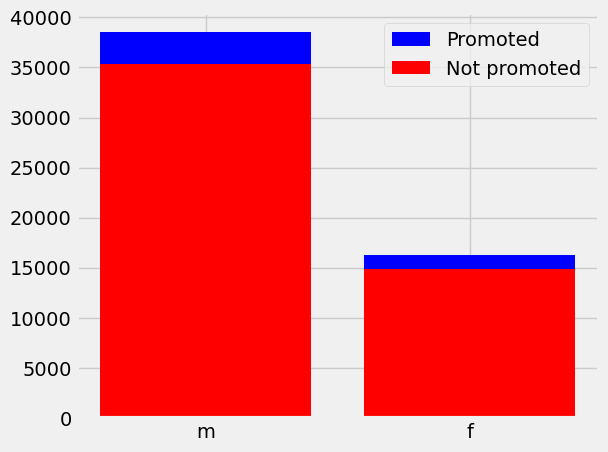

In [756]:
plot_categorical_data('gender', figsize=(6, 5))

📌
### `Insight`: Write here

## `Recruitment Channel Column:`

      value  promoted  not_promoted  total  promoted_perc  not_promoted_perc
0     other      2556         27890  30446       0.083952           0.916048
1  referred       138          1004   1142       0.120841           0.879159
2  sourcing      1974         21246  23220       0.085013           0.914987


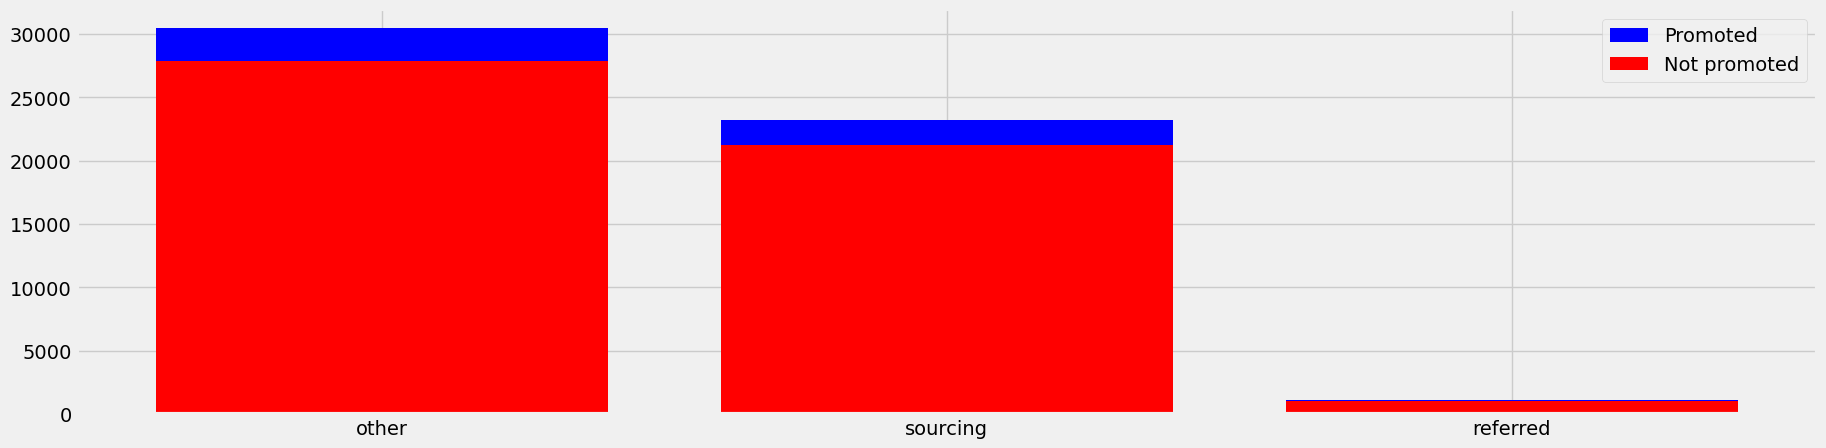

In [757]:
plot_categorical_data('recruitment_channel')

📌
### `Insight`: Write here

## `KPIS > 80% Column:`

   value  promoted  not_promoted  total  promoted_perc  not_promoted_perc
0      0      1406         34111  35517       0.039587           0.960413
1      1      3262         16029  19291       0.169094           0.830906


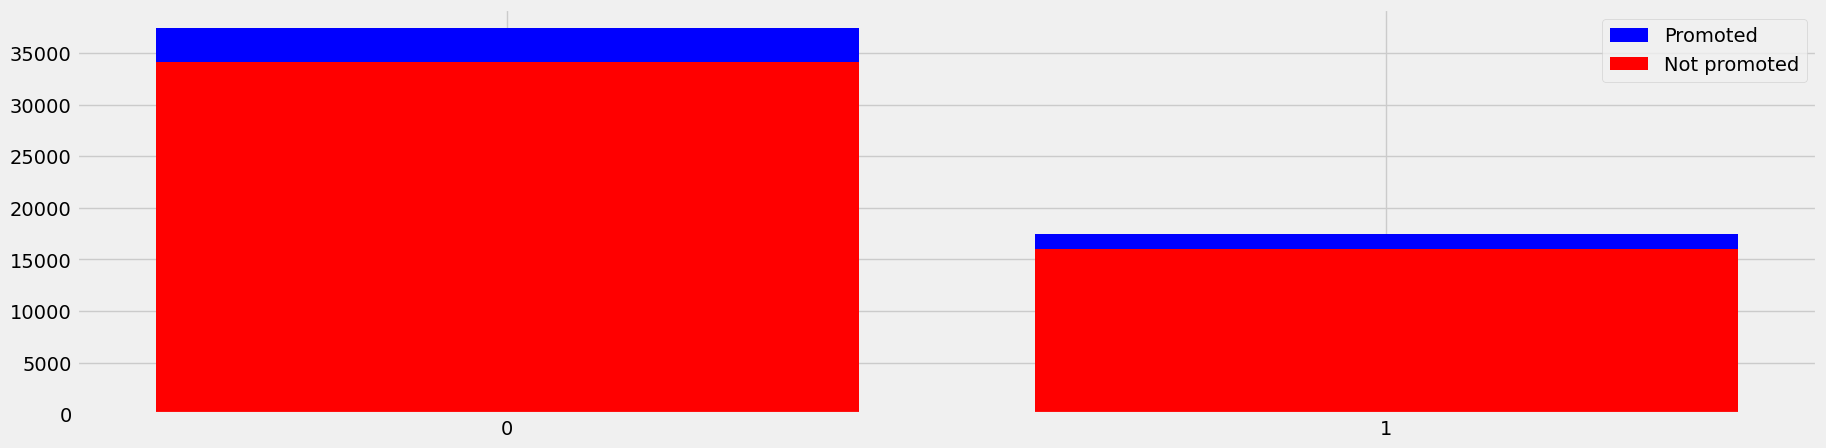

In [758]:
plot_categorical_data('KPIs_met >80%')

📌
### `Insight`: Write here

## `Awards Won? Column`

   value  promoted  not_promoted  total  promoted_perc  not_promoted_perc
0      0      4109         49429  53538       0.076749           0.923251
1      1       559           711   1270       0.440157           0.559843


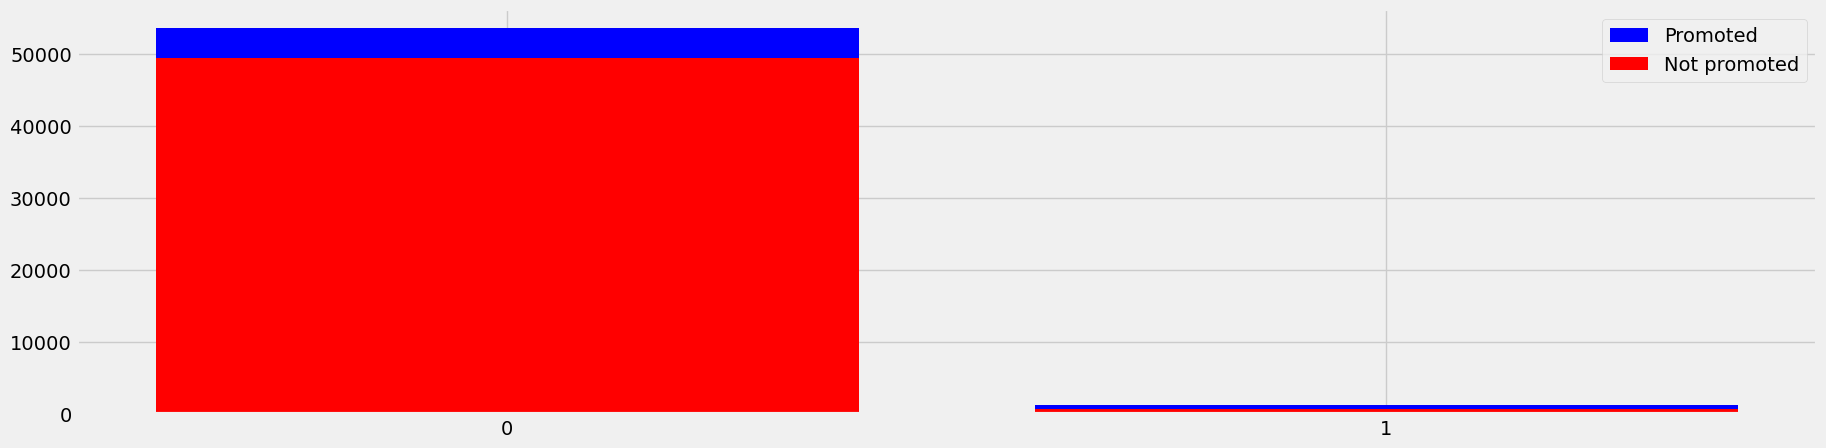

In [759]:
plot_categorical_data('awards_won?')

📌
## `Insight`: Write here

## `Age Column: `

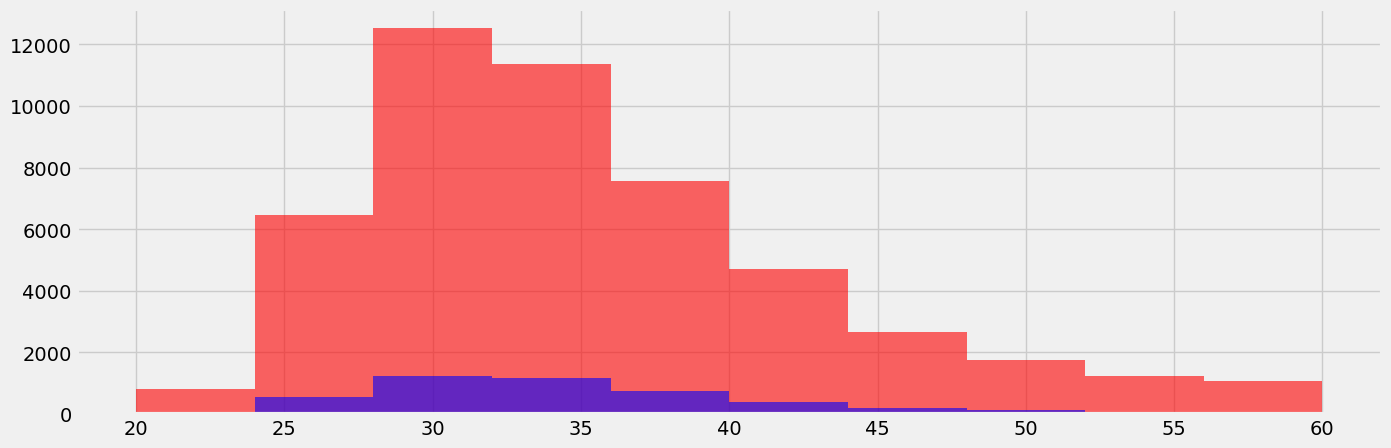

In [760]:
plot_numerical_data('age')

📌
### `Insight`: Write here

## `Number of Trainings Column:`

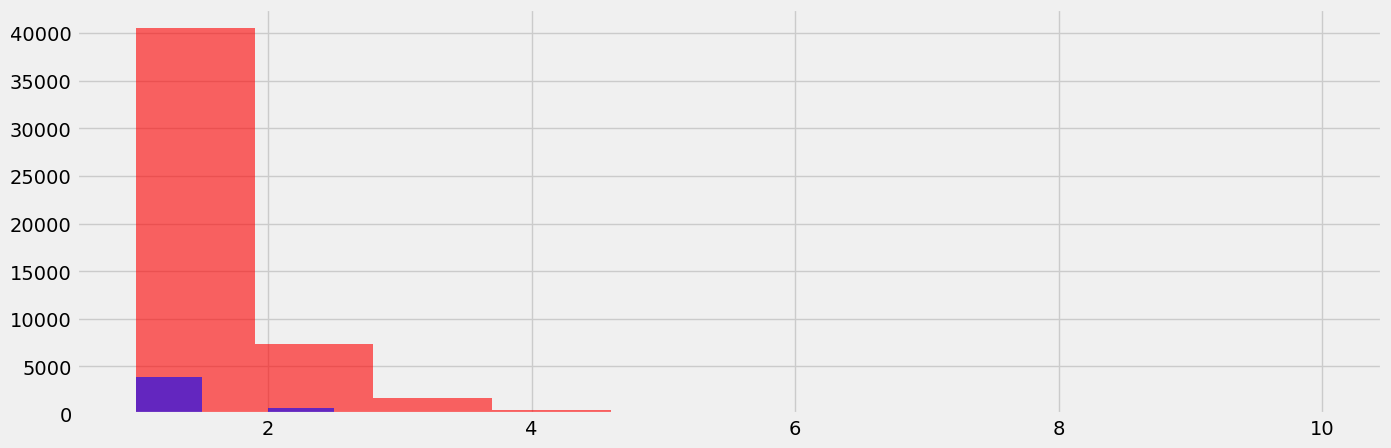

In [761]:
plot_numerical_data('no_of_trainings')

📌
### `Insight`: Write here

## `Average Training Score Column: `

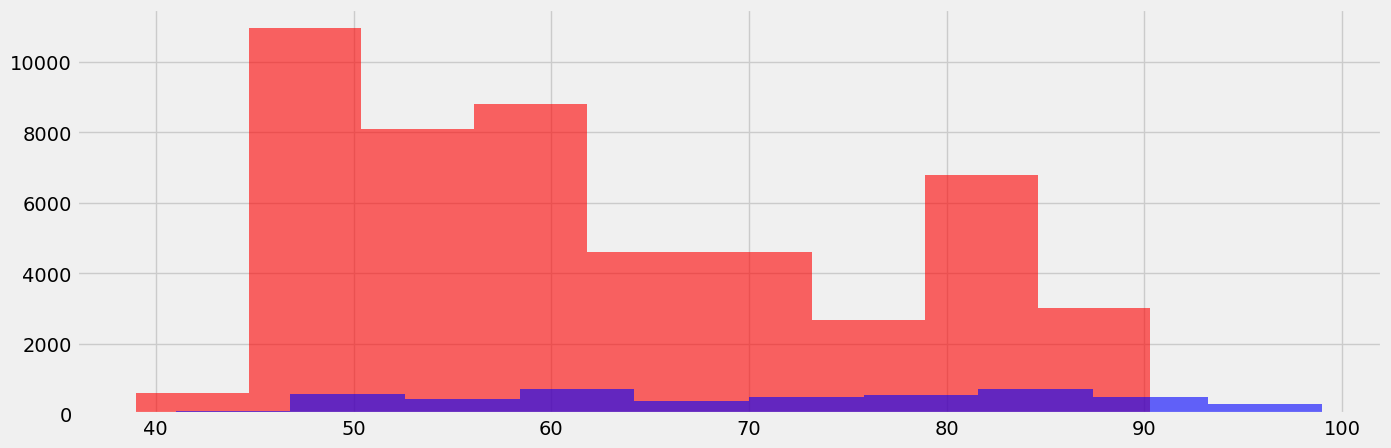

In [762]:
plot_numerical_data('avg_training_score')

📌
### `Insight`: Write here

## `Previous Year Training Column:`

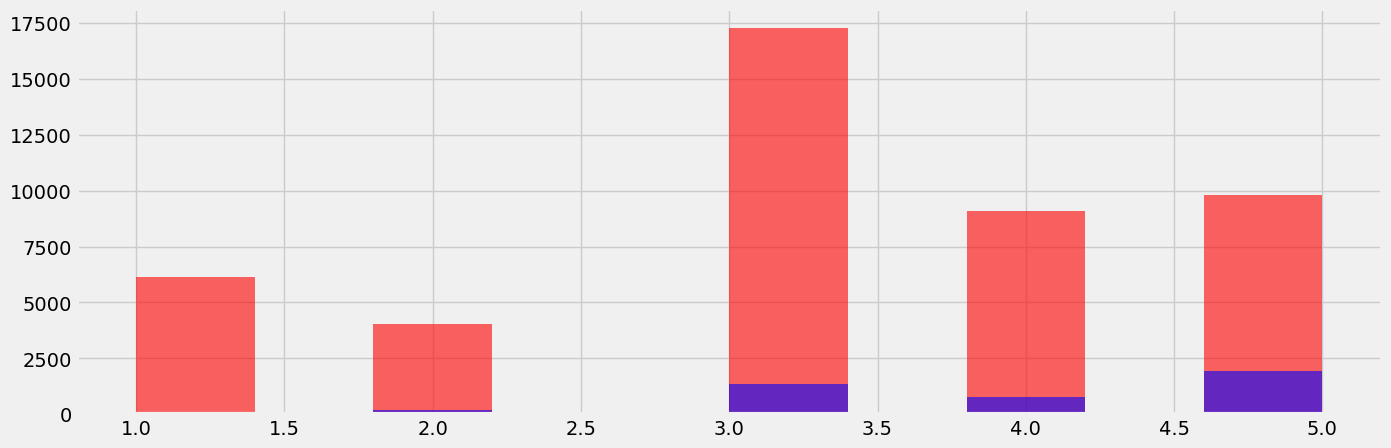

In [763]:
plot_numerical_data('previous_year_rating')

📌
### `Insight`: Write here

## `Length of Service Column:`

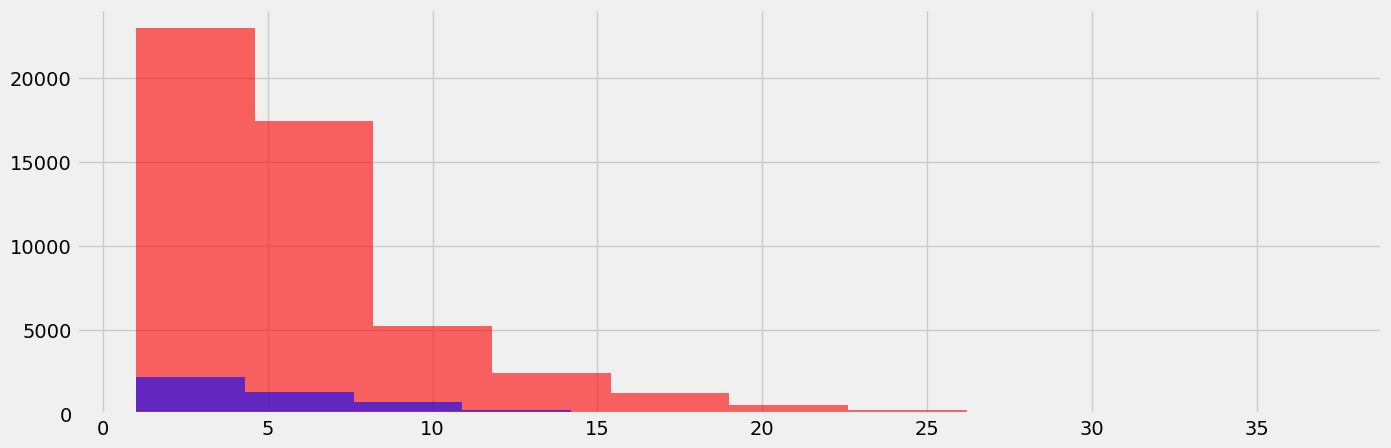

In [764]:
plot_numerical_data('length_of_service')

📌
### `Insight`: Write here

---

# `Correlation Matrix:`

<blockquote style="margin-right:auto; margin-left:auto; color:white; background-color:#4e4e4e; padding: 1em; margin:24px;">

<font color="white" size=+1.0><b>What Correlation Matrix :</b></font>  
        A correlation matrix is a square matrix that displays the correlation coefficients between pairs of variables in a dataset. Each element in the matrix represents the correlation between two variables, indicating the strength and direction of their linear relationship.

    
    The correlation coefficient is a statistical measure that quantifies the degree to which two variables are 
    linearly related. It ranges between -1 and +1, where:


<ul>
<li>A correlation coefficient of +1 indicates a perfect positive correlation, meaning that as one variable increases, the other variable also increases proportionally.
<li> A correlation coefficient of -1 indicates a perfect negative correlation, meaning that as one variable increases, the other variable decreases proportionally.
<li> A correlation coefficient of 0 indicates no linear correlation, suggesting that there is no relationship between the variables.

</ul>        
</blockquote>

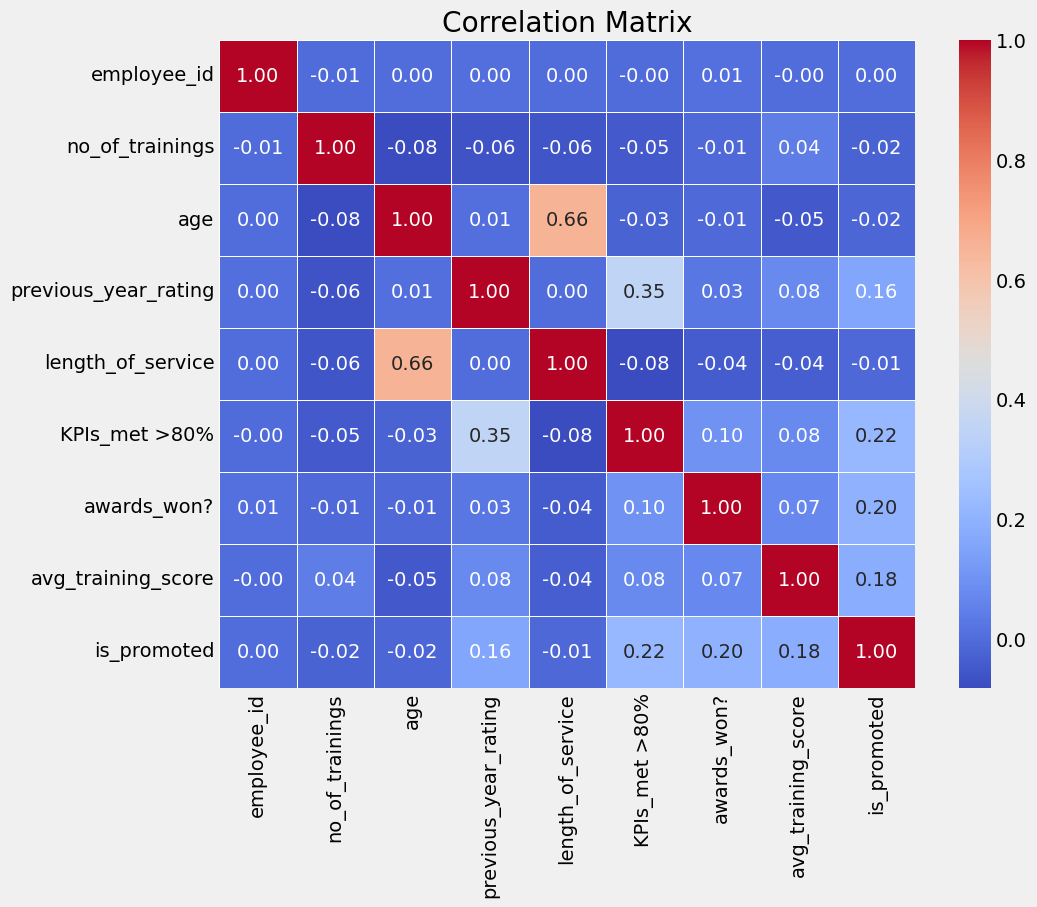

In [765]:
correlation_matrix = train.corr()
# Create a heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

📌
### `Insight`: Write here

array([[<AxesSubplot:title={'center':'employee_id'}>,
        <AxesSubplot:title={'center':'no_of_trainings'}>,
        <AxesSubplot:title={'center':'age'}>],
       [<AxesSubplot:title={'center':'previous_year_rating'}>,
        <AxesSubplot:title={'center':'length_of_service'}>,
        <AxesSubplot:title={'center':'KPIs_met >80%'}>],
       [<AxesSubplot:title={'center':'awards_won?'}>,
        <AxesSubplot:title={'center':'avg_training_score'}>,
        <AxesSubplot:title={'center':'is_promoted'}>]], dtype=object)

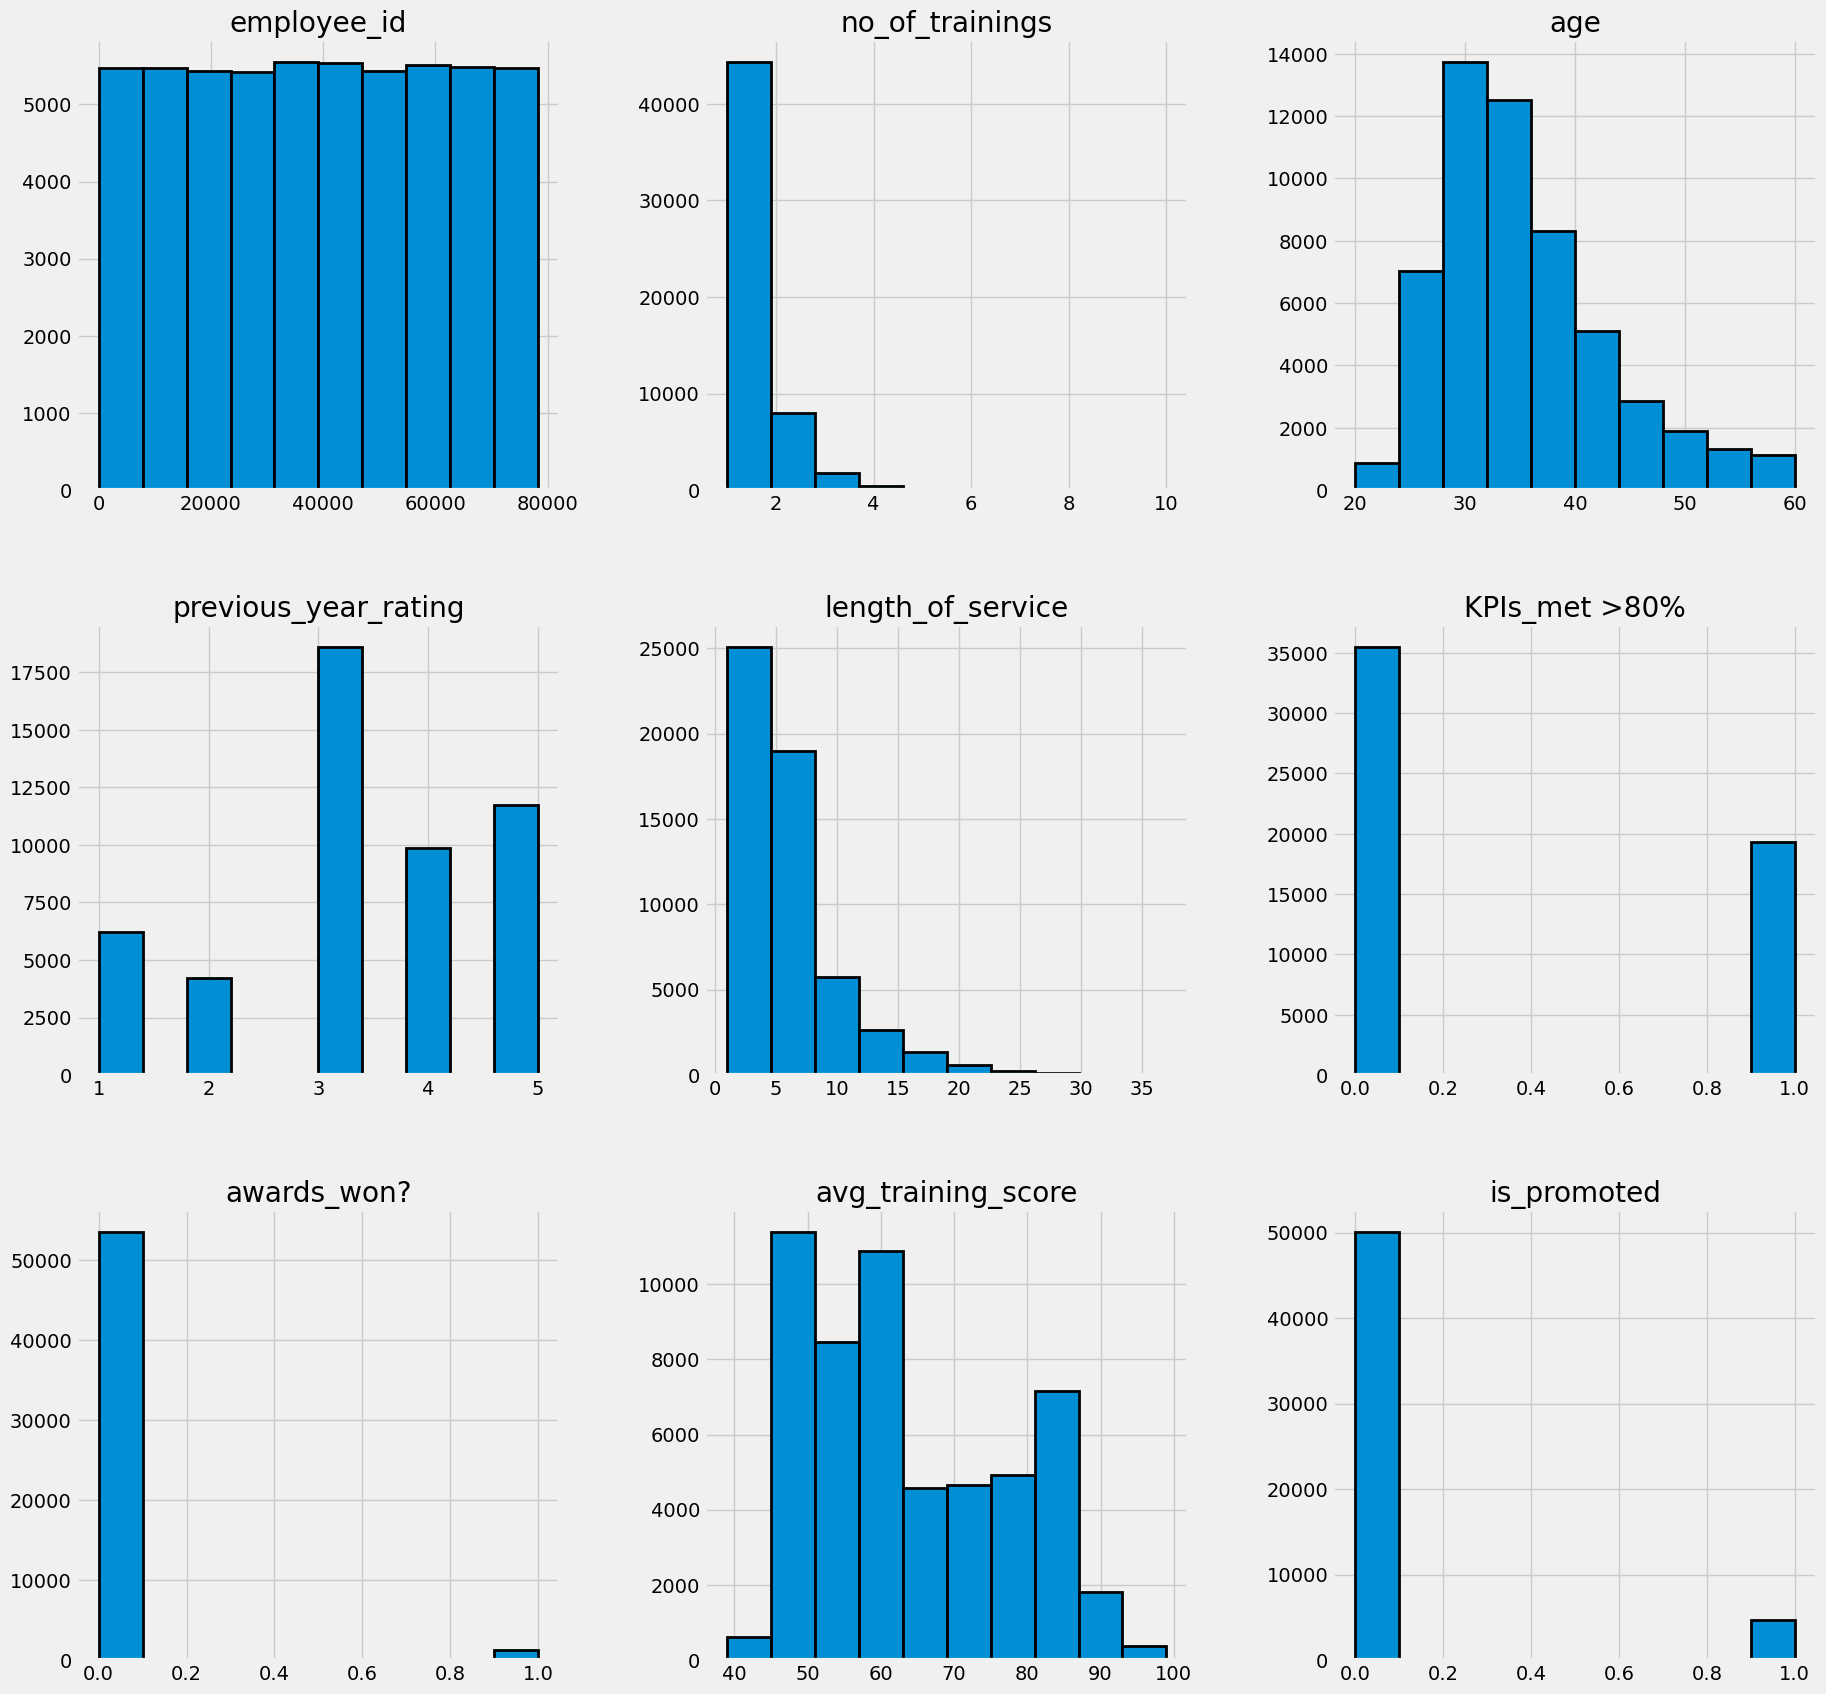

In [766]:
train.hist(edgecolor='k', linewidth = 2 , figsize = (20,20))

📌
### `Insight`: Write here